## PRDE traders with different k-values in heterogeneous populations
In this notebook I run a static, timemode:periodic, stepmode:fixed session with a population of PRDE and ZIP traders with different k values in order to explore the possibility of traders with certain k values outperforming others in a heterogeneos market.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random

import scipy as sp
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import pandas as pd

from BSE import market_session
import helpers

In [10]:
def static_PRDEbalanced_session(k, F, trial_id_str, csv_str):
    # First, configure the trader specifications
    #I have no clue if F is actually being set: Try doing that by overriding the BSE implementation? Or/and figure out a way of checking if it's been changed
    
    sellers_spec = [('PRDE', 5, {'k': k[0], 's_min': -1.0, 's_max': +1.0, 'diffevol["F"]':F}), ('PRDE', 5, {'k': k[1], 's_min': -1.0, 's_max': +1.0, 'diffevol["F"]':F}), ('PRDE', 5, {'k': k[2], 's_min': -1.0, 's_max': +1.0, 'diffevol["F"]':F}), ('PRDE', 5, {'k': k[3], 's_min': -1.0, 's_max': +1.0, 'diffevol["F"]':F})]
    buyers_spec = sellers_spec
    traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}

    # Next, confiure the supply and demand (and plot it)
    sup_range = (100, 200)
    dem_range = sup_range

    # Next, configure order schedules

    start_time = 0
    end_time = 60 * 3
    supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [sup_range], 'stepmode': 'fixed'}]
    demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [dem_range], 'stepmode': 'fixed'}]

    order_interval = 10
    order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
               'interval': order_interval, 'timemode': 'periodic'}

    trial_id = trial_id_str
    tdump = open(csv_str,'w')
    dump_all = True
    verbose = False

    # Now, run the market session
    market_session(trial_id, start_time, end_time, traders_spec, order_sched, tdump, dump_all, verbose)

    tdump.close()

In [2]:
def static_balanced_session(k, F, trial_id_str, csv_str):
    # First, configure the trader specifications
    #I have no clue if F is actually being set: Try doing that by overriding the BSE implementation? Or/and figure out a way of checking if it's been changed
    
    sellers_spec = [('PRDE', 5, {'k': k, 's_min': -1.0, 's_max': +1.0, 'diffevol["F"]':F}), ('ZIP', 15)]
    buyers_spec = sellers_spec
    traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}

    # Next, confiure the supply and demand (and plot it)
    sup_range = (100, 200)
    dem_range = sup_range

    # Next, configure order schedules

    start_time = 0
    end_time = 60 * 3
    supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [sup_range], 'stepmode': 'fixed'}]
    demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [dem_range], 'stepmode': 'fixed'}]

    order_interval = 10
    order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
               'interval': order_interval, 'timemode': 'periodic'}

    trial_id = trial_id_str
    tdump = open(csv_str,'w')
    dump_all = True
    verbose = False

    # Now, run the market session
    market_session(trial_id, start_time, end_time, traders_spec, order_sched, tdump, dump_all, verbose)

    tdump.close()

In [3]:
static_balanced_session(4, 0.8, 'test_7', 'test_7_avg_balance.csv')
df = pd.read_csv('test_7_avg_balance.csv')

B00: PRDE active_strat=[0]:
[0]: s=-0.830016, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.592679, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.290748, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.362257, start=0.000000, $=0.000000, pps=0.000000


B01: PRDE active_strat=[0]:
[0]: s=+0.052569, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.383400, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.528297, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.068604, start=0.000000, $=0.000000, pps=0.000000


B02: PRDE active_strat=[0]:
[0]: s=+0.000674, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.362635, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.308130, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.329046, start=0.000000, $=0.000000, pps=0.000000


B03: PRDE active_strat=[0]:
[0]: s=-0.633168, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.067947, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.989872, start=0.000000, $=0.000000, pps=0.0000

In [7]:
def avg_profit(n, trial_id_str, csv_str, out_csv_str):
    i = 4
    profits = []
    while i < n:
        static_balanced_session(i, 0.8, trial_id_str, csv_str)
        df = pd.read_csv(csv_str)
        profits.append(df.iloc[:,7].max())
        i = i+1

    print(profits)
    profits_df = pd.DataFrame([[i] for i in profits])
    profits_df.to_csv(out_csv_str)
    plt.plot(np.arange(4, n, 1), profits)
    return np.argmax(np.array(profits))+4

B00: PRDE active_strat=[0]:
[0]: s=-0.848845, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.723615, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.160774, start=0.000000, $=0.000000, pps=0.000000
[3]: s=+0.623346, start=0.000000, $=0.000000, pps=0.000000


B01: PRDE active_strat=[0]:
[0]: s=+0.475105, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.875172, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.072405, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.126702, start=0.000000, $=0.000000, pps=0.000000


B02: PRDE active_strat=[0]:
[0]: s=+0.176457, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.182803, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.763510, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.689123, start=0.000000, $=0.000000, pps=0.000000


B03: PRDE active_strat=[0]:
[0]: s=-0.489107, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.144496, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.511423, start=0.000000, $=0.000000, pps=0.0000

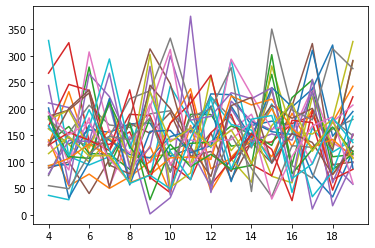

In [10]:
random.seed(2)
j = 0
best_ks = []
while j < 30:
    best_ks.append(avg_profit(20, 'test_7', 'test_7_avg_balance.csv', 'profit_2.csv'))
    j = j+1

print(best_ks)

median: 11.5
mean: 11.766666666666667


(array([3., 3., 1., 3., 5., 3., 1., 4., 3., 4.]),
 array([ 4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. , 17.5, 19. ]),
 <BarContainer object of 10 artists>)

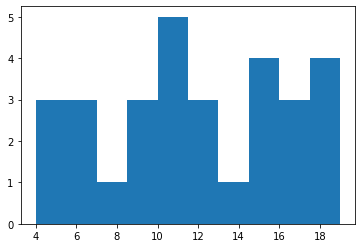

In [11]:
print('median: ' + str(np.median(np.array(best_ks))))
print('mean: ' + str(np.mean(np.array(best_ks))))
plt.hist(np.array(best_ks))

In [14]:
random.seed(2)


trial_id_str = 'test_8'
csv_str = 'test_8_avg_balance.csv'
out_csv_str = '4k_profits.csv'
j = 0
profits = []
while j < 30:
    static_balanced_session(4, 0.8, trial_id_str, csv_str)
    df = pd.read_csv(csv_str)
    profits.append(df.iloc[:,7].max())
    j = j+1

B00: PRDE active_strat=[0]:
[0]: s=-0.816830, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.277885, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.661833, start=0.000000, $=0.000000, pps=0.000000
[3]: s=+0.617924, start=0.000000, $=0.000000, pps=0.000000


B01: PRDE active_strat=[0]:
[0]: s=+0.213603, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.162408, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.683234, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.138661, start=0.000000, $=0.000000, pps=0.000000


B02: PRDE active_strat=[0]:
[0]: s=+0.898791, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.088354, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.110292, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.463519, start=0.000000, $=0.000000, pps=0.000000


B03: PRDE active_strat=[0]:
[0]: s=+0.863693, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.815500, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.152778, start=0.000000, $=0.000000, pps=0.0000

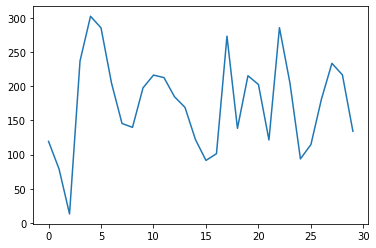

In [15]:
profits_df = pd.DataFrame([[i] for i in profits])
profits_df.to_csv(out_csv_str)
plt.plot(np.arange(0, 30, 1), profits)